In [29]:
#git test
import psycopg2
import pandas as pd

In [63]:
connection = psycopg2.connect(user = "sql",
                                  password = "sqL2020",
                                  host = "host1", # hostname where the postgre database runs on
                                  port = "5433",
                                  database = "wwi")


In [64]:
sql_string='''
            select to_date(to_char(o.order_date,'YYYY-MM'),'YYYY-MM') year_month, count( distinct o.order_id) total_order_count,  count(distinct ol.order_line_id) total_order_lineitem_count,round(AVG(ol.quantity*ol.unit_price),2) as Average_order_amount
            from
            sales.orders o
            inner join sales.order_lines ol on o.order_id = ol.order_id
            group by to_date(to_char(o.order_date,'YYYY-MM'),'YYYY-MM')
          '''
df = pd.read_sql_query(sql_string, connection)
#df

In [65]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('Solarize_Light2')

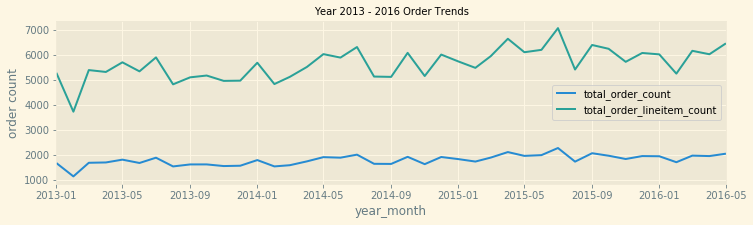

In [66]:
ax = plt.gca()

df.plot(kind='line',x='year_month',y='total_order_count',ax=ax, figsize=(12,3))
df.plot(kind='line',x='year_month',y='total_order_lineitem_count',ax=ax, figsize=(12,3))


plt.title('Year 2013 - 2016 Order Trends', fontsize=10)
plt.ylabel('order count')
plt.show()
